In [1]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

In [2]:
# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [3]:
# Let's check what we have
print(p1)
print(p2)
print(poly)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


Check if the points are within the polygon

In [4]:
# Check if p1 is within the polygon using the within function
p1.within(poly)

True

In [5]:
# Check if p2 is within polygon
p2.within(poly)

False

Okey, so we can see that the first point seems to be inside that polygon and the other one isn’t.

-In fact, the first point is quite close to close to the center of the polygon as we can see if we compare the point location to the polygon centroid:

In [6]:
# The point
print(p1)

# The centroid
print(poly.centroid)

POINT (24.952242 60.1696017)
POINT (24.952242428492358 60.16960179038188)


In [8]:
# Does polygon contain p1?
poly.contains(p1)

True

In [10]:
# Does polygon contain p2?
poly.contains(p2)

False

### Intersect

Another typical geospatial operation is to see if a geometry intersects or touches another one. Again, there are binary operations in Shapely for checking these spatial relationships:

intersects(): Two objects intersect if the boundary or interior of one object intersect in any way with the boundary or interior of the other object.

touches(): Two objects touch if the objects have at least one point in common and their interiors do not intersect with any part of the other object.

In [11]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

See if they intersect

In [12]:
line_a.intersects(line_b)

True

Do they also touch?

In [13]:
line_a.touches(line_b)

True

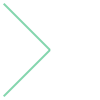

In [14]:
# Create a MultiLineString from line_a and line_b
multi_line = MultiLineString([line_a, line_b])
multi_line

Thus, the line_b continues from the same node ( (1,1) ) where line_a ends.

However, if the lines overlap fully, they don’t touch due to the spatial relationship rule, as we can see:

Check if line_a touches itself:

In [15]:
# Does the line touch with itself?
line_a.touches(line_a)

False

In [16]:
# Does the line intersect with itself?
line_a.intersects(line_a)

True